#### Task 1: Financial Time-Series Anomaly Detection  
##### Objective: Build a tool to identify anomalies in stock price trends to detect unusual activities or market manipulations.  
● Dataset: Yahoo Finance Stock Market Dataset  
● Steps:  
1. Download and preprocess historical stock price data for a few chosen 
companies. 
2. Calculate financial indicators (e.g., SMA, EMA, RSI, Bollinger Bands). 
3. Use Isolation Forest or DBSCAN for unsupervised anomaly detection.  
4. Build a time-series forecasting model using LSTM or Prophet to identify 
deviations.  
5. Visualize detected anomalies on stock price trends.  
● Outcome: A tool or report identifying anomalies in stock price trends  
and possible market manipulations.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [9]:
companies = ["AAPL","MSFT","GOOG"]

In [10]:
data = {ticker:yf.download(ticker,start='2018-01-01', end='2023-01-01')for ticker in companies}

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
for ticker in data:
    data[ticker] = data[ticker][["Close"]].dropna()

KeyError: "None of [Index(['Close'], dtype='object')] are in the [index]"

In [69]:
data = pd.read_excel("data/yahoo_data.xlsx")

In [70]:
data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [71]:
data.shape

(1258, 7)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


````---> LowerCasing the columns name````

```---> Removing extra spaces in columns name```

```---> Standarizing the column name```

In [73]:
data.columns = data.columns.str.lower().str.strip()

In [74]:
data.rename(columns={"close*":"close","adj close**":"adj_close"},inplace=True)

In [75]:
data["date"] = pd.to_datetime(data["date"])

In [76]:
data.isna().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [ ]:
data =  data.sort_values("date")   # Sorting the data on the basis of date columns 

In [ ]:
data = data.set_index("date")  #  Date as Index 
data.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000


## Financial Indicators

In [ ]:
import ta  # Technical Analysis(ta)is a  Library in Python, that provides a wide range of technical analysis indicators. These indicators are commonly used for analyzing financial market data, such as stock prices, forex, and cryptocurrency markets.

In [86]:
data["sma"] = ta.trend.sma_indicator(data["close"],window=20) # This line adds a Simple Moving Average (SMA) to the data. The SMA is calculated by averaging the closing price over the past 20 periods

data["ema"] = ta.trend.ema_indicator(data["close"],window=20)  # Exponential Moving Average (EMA). EMA gives more weight to recent prices, making it more responsive to price changes.

data["rsi"] = ta.momentum.rsi(data["close"],window=20)  # Relative Strength Index (RSI). RSI is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100 and is commonly used to identify overbought or oversold conditions in a market.

data.dropna(inplace=True)  # drop all empty values 


#### Bollinger Bands
Bollinger Bands consist of three lines:

The ``middle band`` is a Simple Moving Average (SMA) of the closing price.

The ``upper band`` (the Bollinger high band) is the middle band + a multiple of the standard deviation of the price. This is controlled by the window_dev parameter. Here, window_dev=2 means that the upper band will be 2 standard deviations above the middle band.

The ``lower band`` (the Bollinger low band) is the middle band - the same multiple of the standard deviation. Again, with window_dev=2, it will be 2 standard deviations below the middle ban

In [ ]:
bb = ta.volatility.BollingerBands(data["close"],window=20,window_dev=2)

data["bb_high"] = bb.bollinger_hband()   # Bollinger Low band
data["bb_low"] = bb.bollinger_lband()   # Bollinger high Band

data.dropna(inplace=True)

In [91]:
data.head()

,open,high,low,close,adj_close,volume,sma,ema,rsi,bb_high,bb_low
date,,,,,,,,,,,
2018-06-25,24463.73,24463.73,24084.39,24252.80,24252.80,439130000,24857.4590,24781.278138,40.424594,25544.147367,24170.770633
2018-06-26,24281.89,24384.21,24241.22,24283.11,24283.11,301130000,24853.5420,24733.833554,41.188323,25552.290818,24154.793182
2018-06-27,24303.11,24569.02,24115.82,24117.59,24117.59,313790000,24826.0325,24675.143692,38.361436,25591.960947,24060.104053
2018-06-28,24064.19,24308.16,23997.21,24216.05,24216.05,305020000,24816.0430,24631.420483,40.901230,25607.883500,24024.202500
2018-06-29,24323.93,24509.52,24269.71,24271.41,24271.41,329070000,24797.8530,24597.133770,42.308162,25621.547591,23974.158409


In [57]:
from sklearn.ensemble import IsolationForest

In [92]:
features = ["close","sma","ema","rsi","bb_high","bb_low"]
model = IsolationForest(contamination=0.01,random_state=42,n_estimators=80)

In [ ]:
data["anomly"] = model.fit_predict(data[features])  #  Isolation Forest returns -1 and 1 as output by default

In [ ]:
data["anomly"] = data["anomly"].map({1:0,-1:1})  # where 1 means anomly   

In [95]:
data.head()

,open,high,low,close,adj_close,volume,sma,ema,rsi,bb_high,bb_low,anomly
date,,,,,,,,,,,,
2018-06-25,24463.73,24463.73,24084.39,24252.80,24252.80,439130000,24857.4590,24781.278138,40.424594,25544.147367,24170.770633,0
2018-06-26,24281.89,24384.21,24241.22,24283.11,24283.11,301130000,24853.5420,24733.833554,41.188323,25552.290818,24154.793182,0
2018-06-27,24303.11,24569.02,24115.82,24117.59,24117.59,313790000,24826.0325,24675.143692,38.361436,25591.960947,24060.104053,0
2018-06-28,24064.19,24308.16,23997.21,24216.05,24216.05,305020000,24816.0430,24631.420483,40.901230,25607.883500,24024.202500,0
2018-06-29,24323.93,24509.52,24269.71,24271.41,24271.41,329070000,24797.8530,24597.133770,42.308162,25621.547591,23974.158409,0


<Axes: xlabel='anomly'>

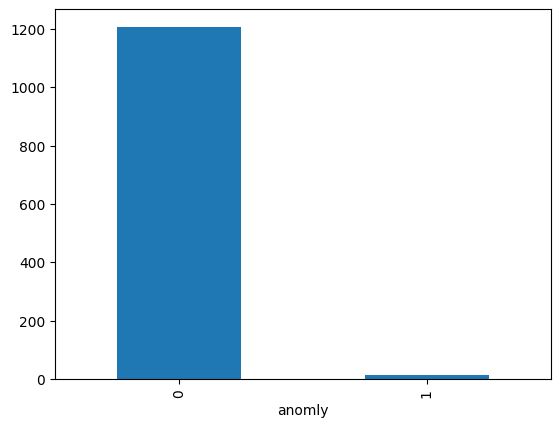

In [ ]:
data["anomly"].value_counts().plot(kind="bar")   # where 1 mean anomly